## S89A Deep Learning for NLP
## `Assignment 01`    	
## Handed out: 06/24/2019                             
## Due by 11:59 PM EST on Tuesday, 07/02/2019
## Submitted by: Saurabh Kulkarni

### INSTRUCTION: 

Please, describe every step of your work and present all intermediate and final results in a Word document. If you know how, please be free to organize your submission in one Jupyter notebook.  Please, copy-past text (ASCII) version of all essential commands and snippets of results into the Word document with explanations of the purpose of those commands. We cannot retype text that is in JPG images. Please, always submit a separate copy of the original, working scripts and/or class files you used. Sometimes we need to run your code and retyping is too costly. Please include in your MS Word document all the relevant portions of the console output or output files. PLEASE DO NOT EMBED files into your MS Word document. For issues and comments visit the class Piazza site.

In [1]:
## Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import collections
from nltk.corpus import wordnet as wn
from keras.utils import to_categorical

Using TensorFlow backend.


### Problem 1 (25%).
Use the text of the Universal Declaration of Human Rights (UDHR). Create a table for 4 languages of your choice. Use that table to collect statistics about those languages. Place in that table the number of words in UDHR in each language, number of unique words, average length of words, number of sentences contained in UDHR and average number of words per sentence. You do not have to populate the table from your code. You may, but you may also determine individual values separately and enter them in the table manually.  Create a distribution of sentence lengths for all four language. Distribution of sentence lengths presents the number of sentences of varying length. Plot those (non-cumulative) distributions for all four languages using one diagram. 


### Solution 1:

**Step 1:** Download the required nltk packages.

In [2]:
nltk.download('udhr')
nltk.download('punkt')
from nltk.corpus import udhr

[nltk_data] Downloading package udhr to
[nltk_data]     C:\Users\A0687514\AppData\Roaming\nltk_data...
[nltk_data]   Package udhr is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A0687514\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

**Step 2:** Here we loop over four languages selected from the list `udhr.fileids()` and collect the statistics asked in the question. 
- `udhr.words()` and `udhr.sents()` gives us a list of all the words and sentences, respectively, present in UDHR.
- The total number of words, unique words and number of sentences are counted by simply counting the number of items in the list.
- We loop over all words and sentences and store word lengths and sentence lengths in a list. And then calculate the averages using these lists.

In [4]:
lang = ['English-Latin1', 'Hindi-UTF8', 'Kannada-UTF8', 'Hebrew_Ivrit-Hebrew']
udhr_stats_dict = {}
sents_len_dict = {}

for l in lang:
    
    udhr_words = udhr.words(l)
    n_words = len(udhr_words)
    n_unique = len(np.unique(udhr_words))

    word_len = []
    for w in udhr_words:
        word_len.append(len(w))

    avg_word_len = np.mean(word_len)

    udhr_sents = udhr.sents(l)
    n_sents = len(udhr_sents)

    sent_len = []
    for s in udhr_sents:
        sent_len.append(len(s))
        
    sents_len_dict[l] = sent_len

    avg_sent_len = np.mean(sent_len)

    udhr_stats_dict[l] = [n_words, n_unique, avg_word_len, n_sents, avg_sent_len]

**Step 3:** Converting dictionary to data frame for better visual presentation.

In [5]:
df_ind = ['Total Words', '# Unique Words', 'Avg. Word Length', '# Sentences', 'Avg. Sentence Length']
udhr_stats_df = pd.DataFrame(udhr_stats_dict, index=df_ind)
udhr_stats_df

,English-Latin1,Hindi-UTF8,Kannada-UTF8,Hebrew_Ivrit-Hebrew
Total Words,1781.00000,2524.000000,2529.000000,1530.000000
# Unique Words,533.00000,224.000000,278.000000,782.000000
Avg. Word Length,4.64402,1.236529,1.271649,3.960784
# Sentences,67.00000,8.000000,31.000000,71.000000
Avg. Sentence Length,26.58209,315.500000,81.580645,21.549296


**Step 4:** Plotting the histograms of sentence lengths for each of the languages using the `sents_len_dict` that we created earlier and looping over all the four languages. We use the matplotlib function `hist()` to plot the histograms.

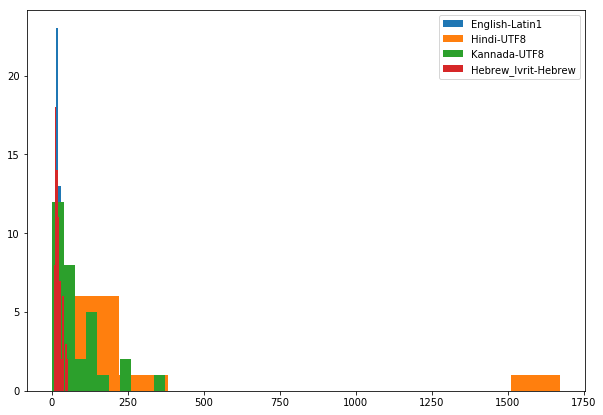

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
for l in lang:
    ax.hist(sents_len_dict[l], label=l)
ax.legend(loc='best')

### Problem 2 (25%). 
Identify 10 most frequently used words longer than 7 characters in the entire corpus of Inaugural Addresses. Do not identify 10 words for every speech but rather 10 words for the entire corpus. Which among those words has the largest number of synonyms? List all synonyms for those 10 words. Which one of those 10 words has the largest number of hyponyms? List all hyponyms of those 10 most frequently used “long” words. The purpose of this problem is to familiarize you with WordNet and concepts of synonyms and hyponyms.


### Solution 2:

**Step 1:** Download the required nltk packages.

In [7]:
nltk.download('inaugural')
nltk.download('wordnet')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\A0687514\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A0687514\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Step 2:** Here we loop over all the inaugural speeches file id's and store the words that are longer than 7 characters in a list called `words` using another for loop inside the first one. That way, we have a collection of all the "long" words from all the speeches. Next, we create a list of top 10 words using the function `Counter()` from `collections` library.

In [8]:
inaugural_fileids = inaugural.fileids()

In [9]:
words = []
for f in inaugural_fileids:
    words_f = inaugural.words(f)
    for w in words_f:
        if len(w)>7:
            words.append(w.lower())

In [10]:
counter = collections.Counter(words)
top10_tuples = counter.most_common(10)
unzipped = zip(*top10_tuples)
top10 = list(list(unzipped)[0])

**Step 3:** 
Reference: https://www.nltk.org/book/ch02.html

Using the `synsets()` function from WordNet dictionary from nltk, we get the set of synonyms which we store in the list called synonyms. Then we do a unique count on each of our 10 most common words.

In [11]:
for w in top10:
    synonyms = []
    for synset in wn.synsets(w):
        synonyms = synonyms+synset.lemma_names()
    print('Word: %s:'%w) 
    print(np.unique(synonyms))
    syn_count = len(np.unique(synonyms))
    print('Number of synonyms: %s\n'%syn_count)

Word: government:
['administration' 'authorities' 'governance' 'governing' 'government'
 'government_activity' 'political_science' 'politics' 'regime']
Number of synonyms: 9

Word: citizens:
['citizen']
Number of synonyms: 1

Word: constitution:
['Constitution' 'Constitution_of_the_United_States' 'Old_Ironsides'
 'U.S._Constitution' 'US_Constitution' 'United_States_Constitution'
 'composition' 'constitution' 'establishment' 'formation'
 'fundamental_law' 'make-up' 'makeup' 'organic_law' 'organisation'
 'organization' 'physical_composition']
Number of synonyms: 17

Word: american:
['American' 'American_English' 'American_language']
Number of synonyms: 3

Word: national:
['home' 'interior' 'internal' 'national' 'subject']
Number of synonyms: 5

Word: congress:
['Congress' 'U.S._Congress' 'US_Congress' 'United_States_Congress'
 'carnal_knowledge' 'coition' 'coitus' 'congress' 'copulation'
 'intercourse' 'relation' 'sex_act' 'sexual_congress' 'sexual_intercourse'
 'sexual_relation']
Number

**Answer:** We can see that the word 'constitution' has maximum number of synonyms with the count being 17.

**Step 4:** We follow similar looping structure as we did in step 3 here, except that instead of getting the `lemma_names` from `synsets`, we get the `hyponyms()`.

In [12]:
for w in top10:
    hyponyms = []
    for synset in wn.synsets(w):
        for hypo in synset.hyponyms():
            for lemma in hypo.lemmas():
                hyponyms.append(lemma.name())
    print('Word: %s:'%w) 
    print(np.unique(hyponyms))
    hyp_count = len(np.unique(hyponyms))
    print('Number of hyponyms: %s\n'%hyp_count)

Word: government:
['Downing_Street' 'ancien_regime' 'authoritarian_regime'
 'authoritarian_state' 'bureaucracy' 'court' 'empire' 'federal_government'
 'geopolitics' 'government-in-exile' 'lawmaking' 'legislating'
 'legislation' 'local_government' 'military_government' 'misgovernment'
 'misrule' 'palace' 'papacy' 'pontificate' 'practical_politics'
 'pupet_regime' 'puppet_government' 'puppet_state' 'realpolitik'
 'royal_court' 'state' 'state_government' 'stratocracy'
 'totalitarian_state' 'totalitation_regime' 'trust_busting']
Number of hyponyms: 32

Word: citizens:
['active_citizen' 'civilian' 'elector' 'freeman' 'freewoman'
 'private_citizen' 'repatriate' 'thane' 'voter']
Number of hyponyms: 9

Word: constitution:
['collectivisation' 'collectivization' 'colonisation' 'colonization'
 'communisation' 'communization' 'federation' 'genetic_constitution'
 'genotype' 'grain' 'karyotype' 'phenotype' 'settlement' 'structure'
 'texture' 'unionisation' 'unionization']
Number of hyponyms: 17

Wor

**Answer:** We can see that the word 'american' has maximum number of synonyms with the count being 109.

### Problem 3. 
Consider 100 points along the straight line in $(x,y)$ plane represented by the linear equation $y=0.3x+0.2$. Distribute those points along the line uniformly in the interval between -2.0 and 3.0. To the y coordinate of each point add a random normally distributed value with standard deviation of 1 and mean 0. You have created and artificial set of random measurements. Create a shallow neural network with one layer which will be able to predict y value corresponding to any x value in the above interval. Implement and train the network using Keras API. Report on the accuracy of your model. This is a rather trivial problem and you do not need neural networks to solve it. We are practicing Keras API.


### Solution 3:

**Step 1:** Create datasets. We create X using uniform random number generator from numpy library. Then we add the noise to the line $y = 0.3*x + 0.2$ with mean at 0 and standard deviation of 0.1 and call that our y.

In [13]:
x = np.random.uniform(low=-2.0, high=3.0, size=100)

In [14]:
line = 0.3*x + 0.2 
noise = np.random.normal(loc=0, scale=0.1, size=100)
y = line+noise
y.shape

(100,)

**Step 2:** Create train and test data sets using random number generator from numpy library again. 0.7 is the probability, so we basically get a condition which checks if the value is < 0.7 which we store as `mask`.

In [15]:
np.random.seed(9001)
mask = np.random.rand(100) < 0.7 
x_train = x[mask]
x_test = x[~mask]
y_train = y[mask]
y_test = y[~mask]

**Step 3:** Build the sequential network using `Sequential()` from the `keras` library. Then we add the first dense layer with one node since our y is quantitative. So we only want one output to come out of the network.

In [16]:
model = Sequential()
# model.add(Dense(2, input_shape=(1,)))
model.add(Dense(1, input_shape=(1,)))
model.summary()

W0702 20:52:17.786554  8784 deprecation_wrapper.py:119] From C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 20:52:17.803554  8784 deprecation_wrapper.py:119] From C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 20:52:17.807554  8784 deprecation_wrapper.py:119] From C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Step 4:** Compile and train the model on our data set. We use `SGD` optimizer and `MSE` loss and run it for 50 epochs.

In [17]:
model.compile(optimizer='sgd', loss='mse')

W0702 20:52:19.261554  8784 deprecation_wrapper.py:119] From C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=50,
                    verbose=1,
                    validation_data=[x_test, y_test]
                   )

W0702 20:52:19.780554  8784 deprecation_wrapper.py:119] From C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0702 20:52:19.781554  8784 deprecation_wrapper.py:119] From C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 64 samples, validate on 36 samples
Epoch 1/50
64/64 [==============================] - 0s 3ms/step - loss: 4.4843 - val_loss: 1.6950
Epoch 2/50
64/64 [==============================] - 0s 203us/step - loss: 2.7725 - val_loss: 1.0524
Epoch 3/50
64/64 [==============================] - 0s 125us/step - loss: 1.7212 - val_loss: 0.6605
Epoch 4/50
64/64 [==============================] - 0s 203us/step - loss: 1.0733 - val_loss: 0.4212
Epoch 5/50
64/64 [==============================] - 0s 141us/step - loss: 0.6774 - val_loss: 0.2754
Epoch 6/50
64/64 [==============================] - 0s 109us/step - loss: 0.4324 - val_loss: 0.1861
Epoch 7/50
64/64 [==============================] - 0s 141us/step - loss: 0.2818 - val_loss: 0.1312
Epoch 8/50
64/64 [==============================] - 0s 141us/step - loss: 0.1898 - val_loss: 0.0971
Epoch 9/50
64/64 [==============================] - 0s 141us/step - loss: 0.1304 - val_loss: 0.0757
Epoch 10/50
64/64 [==============================] - 0s 39

**Step 5:** We use `r2_score()` function from `sklearn` library to get the R-squared for the predicted and the true y_test, which we get as ~0.88. That is good, it means we can explain 88% of the variation in our test set using our trained model.

In [19]:
y_pred = model.predict(x_test)

In [20]:
r2_score(y_test, y_pred)

0.8805575353055156

**Step 6:** Here we just plot the true and the predicted y that we get using the trained model.

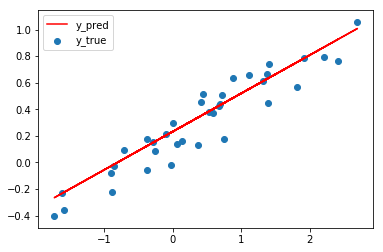

In [21]:
plt.scatter(x_test, y_test, label='y_true')
plt.plot(x_test, y_pred, c='red', label='y_pred')
plt.legend(loc='best')

### Problem 4.  
Consider three points in (x,y) plane with coordinates (-2,0), (0,1.7) and (2.1,0). Around each of those three centers create a cloud of 100 randomly generated points. For the radial distance of any one of those points from its center use a random normal distribution.  For the angular coordinate of any one of “cloud” points use the uniform distribution. Once you have generated all three sets of cloud points plot them in the same diagram using three different colors. There should exist some overlap between the clouds. Create a two-layer neural network. Use Keras API. Fit a model that could predict whether a randomly generated point in the plane belongs to cloud 1, centered around (-2,0), cloud 2, centered around (0,1.7) or cloud 3, centered around (2.1,0). You can make that prediction in a much simpler way, however, we are practicing Keras API.

### Solution 4:

**Step 1:** Here we generate our three clouds of data points and the respective labels for it. We use the means for these clouds as given in the question and the covariances were adjusted arbitrarily by trial and error to make sure there is some overlap between the clouds as stated in the question.

In [22]:
num_points=100

# means and covariances
mean1 = [-2, 0]
mean2 = [0, 1.7]
mean3 = [2.1, 0]

cov = [[0.7, 0], [0.7, 1]]

# cloud 1 samples
X1=np.random.multivariate_normal(mean1, cov, num_points)
# cloud 2 samples
X2=np.random.multivariate_normal(mean2, cov, num_points)
# cloud 3 samples
X3=np.random.multivariate_normal(mean3, cov, num_points)


#cloud 1 labels
Y1=0*np.ones(num_points)
#cloud 2 labels
Y2=1*np.ones(num_points)
#cloud 3  labels
Y3=2*np.ones(num_points)

C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  del sys.path[0]
C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  from ipykernel import kernelapp as app


**Step 2:** Plot of the three clouds.

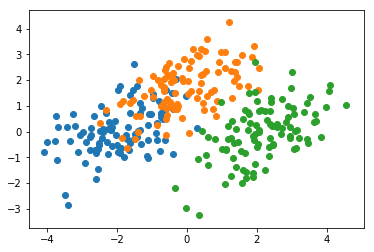

In [23]:
#cloud 1 
plt.scatter(X1[:,0],X1[:,1])
#cloud 2 
plt.scatter(X2[:,0],X2[:,1])
#cloud 3 
plt.scatter(X3[:,0],X3[:,1])

plt.show()

**Step 3:** Concatenate our data points and the respective labels in the same order to make sure we map the points and th labels accurately to create one dataset of 300 X's and 300 class labels.

In [24]:
X=np.concatenate([X1,X2,X3],axis=0)
Y=np.concatenate([Y1,Y2,Y3],axis=0)

Y=to_categorical(Y)

x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=42,shuffle=True)

In [25]:
Y.shape

(300, 3)

**Step 4:** Build our network using `Sequential()` again and add two layers each with 3 nodes in the output layer repesenting the three class labels.

In [26]:
model = Sequential()
model.add(Dense(50, input_shape=(2,)))
model.add(Dense(3, activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


**Step 5:** Compile and run the model with `Adam()` optimizer, `binary_crossentropy` loss and 20 epochs.

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W0702 20:52:28.338570  8784 deprecation.py:323] From C:\Users\A0687514\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=20,
                    verbose=1,
                    validation_data=[x_test, y_test]
                   )

Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 0s 1ms/step - loss: 2.2843 - acc: 0.7778 - val_loss: 2.1682 - val_acc: 0.7944
Epoch 2/20
240/240 [==============================] - 0s 129us/step - loss: 2.0021 - acc: 0.8056 - val_loss: 1.8850 - val_acc: 0.8167
Epoch 3/20
240/240 [==============================] - 0s 121us/step - loss: 1.6504 - acc: 0.7972 - val_loss: 1.1688 - val_acc: 0.8222
Epoch 4/20
240/240 [==============================] - 0s 125us/step - loss: 0.5677 - acc: 0.7944 - val_loss: 0.5191 - val_acc: 0.8333
Epoch 5/20
240/240 [==============================] - 0s 129us/step - loss: 0.2826 - acc: 0.8611 - val_loss: 0.4508 - val_acc: 0.8444
Epoch 6/20
240/240 [==============================] - 0s 121us/step - loss: 0.2861 - acc: 0.8667 - val_loss: 0.4373 - val_acc: 0.8500
Epoch 7/20
240/240 [==============================] - 0s 163us/step - loss: 0.2603 - acc: 0.8556 - val_loss: 0.3572 - val_acc: 0.8500
Epoch 8/20
240/240 

**Answer:** We see that we get a validation accuracy of 0.8833